In [81]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [82]:
# retrieve dataset
url = 'https://raw.githubusercontent.com/ncmerem/LinearRegression/main/wqW.csv'
data = pd.read_csv(url, sep=';')
#data.head()
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [83]:
# z-score normalization
zdata = (data - data.mean()) / data.std()
zdata.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03
mean,2.653755e-14,-1.053431e-14,5.344610e-14,-2.538326e-15,-1.419036e-15,6.210721e-18,-1.387439e-16,2.148461e-12,1.316599e-14,-1.280696e-14,-2.846868e-14,3.622675e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.619982e+00,-1.966784e+00,-2.761461e+00,-1.141827e+00,-1.683102e+00,-1.958477e+00,-3.043919e+00,-2.312802e+00,-3.101091e+00,-2.364468e+00,-2.043089e+00,-3.249530e+00
25%,-6.574340e-01,-6.770318e-01,-5.304215e-01,-9.249530e-01,-4.472890e-01,-7.237012e-01,-7.144009e-01,-7.706280e-01,-6.507699e-01,-6.996389e-01,-8.241915e-01,-9.912727e-01
50%,-6.492444e-02,-1.809733e-01,-1.172660e-01,-2.348977e-01,-1.268931e-01,-7.691388e-02,-1.026084e-01,-9.608339e-02,-5.474574e-02,-1.739035e-01,-9.285319e-02,1.378561e-01
75%,5.275851e-01,4.142970e-01,4.611517e-01,6.917479e-01,1.935028e-01,6.286722e-01,6.738976e-01,6.929749e-01,6.075033e-01,5.270772e-01,7.197450e-01,1.378561e-01
max,8.704217e+00,8.152811e+00,1.095530e+01,1.171292e+01,1.374167e+01,1.491679e+01,7.097720e+00,1.502976e+01,4.183648e+00,5.171074e+00,2.995020e+00,3.525242e+00


In [84]:
# statistics for model evaluation
datastddevs = data.std()
datameans = data.mean()
print("stddevs\n", sigma)
print("\nmeans\n", mu)

stddevs
 fixed acidity            0.843868
volatile acidity         0.100795
citric acid              0.121020
residual sugar           5.072058
chlorides                0.021848
free sulfur dioxide     17.007137
total sulfur dioxide    42.498065
density                  0.002991
pH                       0.151001
sulphates                0.114126
alcohol                  1.230621
quality                  0.885639
dtype: float64

means
 fixed acidity             6.854788
volatile acidity          0.278241
citric acid               0.334192
residual sugar            6.391415
chlorides                 0.045772
free sulfur dioxide      35.308085
total sulfur dioxide    138.360657
density                   0.994027
pH                        3.188267
sulphates                 0.489847
alcohol                  10.514267
quality                   5.877909
dtype: float64


In [85]:
# cost function, mean squared error
def mse_cost(feature, target, weight):
  # sq errors = (features - targets)^2
  se = np.power(((feature * weight.T) - target), 2)
  # mean, add up, divide by num of instances
  return np.sum(se) / (2 * len(feature))

In [86]:
def train(features, target, weights, step, iters):
# hold new weights in a temp vector while doing calculations
  tempweights = np.matrix(np.zeros(weights.shape))

  #to calculate partial derivative wrt each parameter, need number of parameters
  parameters = int(weights.ravel().shape[1])

  # create cost vector to log changes in cost
  costlog = np.zeros(iters + 1)
  costlog[0] = mse_cost(features, target, weights)
  
  # update weights every iteration
  for i in range(iters):
    # error vector, error for each instance [1279, 1]
    errors = (features * weights.T) - target

    # repeat for each parameter (in this case 12, 12 features)
    for j in range(parameters):
      # partial derivative matrix = error for each instance * values of 1 parameter for each instance
      # parders = errors vector * a feature column
      # ELEMENT WISE MULTIPLICATION, [1279, 1] = [1279, 1] * [1279, 1]
      parders = np.multiply(errors, features[:,j])

      # new weight = old weight - lr * mean derivative
      # mean derivative = summed up parders elements / num instances, 1279 elements => 1, 1/1279 instances
      tempweights[0,j] = weights[0,j] - ((step / len(features)) * np.sum(parders))
      
    # after calculating each new weight for each parameter, update weights
    weights = tempweights

    # log the cost for this iteration, should see decrease
    costlog[i + 1] = mse_cost(features, target, weights)

    # print cost every 10 iterations
    if i % 10 == 0:
      print("iter={}    cost={}".format(i, costlog[i]))
    
  return weights, costlog

In [87]:
# define features X, targets y, weights W
zdata['x_0'] = 1
X = zdata.drop(['quality'], axis=1)
y = zdata['quality']

X = np.matrix(X.values)
y = np.matrix(y.values).T
W = np.matrix(np.zeros(shape=[1,X.shape[1]]))

print(X.shape, y.shape, W.shape)

(4898, 12) (4898, 1) (1, 12)


In [88]:
# split data into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)
print(X_train.shape, y_train.shape, W.shape)
print(X_test.shape, y_test.shape)

(3918, 12) (3918, 1) (1, 12)
(980, 12) (980, 1)


In [89]:
mse_cost(X_train, y_train, W)

0.4930676279622134

In [90]:
lr = 0.01
iters = 1000
W_final, cost = train(X_train, y_train, W, lr, iters)

iter=0    cost=0.4930676279622134
iter=10    cost=0.4596196454418549
iter=20    cost=0.4380588459991032
iter=30    cost=0.4233332282474974
iter=40    cost=0.41270161589102144
iter=50    cost=0.404644485231683
iter=60    cost=0.3982946878451881
iter=70    cost=0.39313854180688074
iter=80    cost=0.388857818216767
iter=90    cost=0.38524537908105955
iter=100    cost=0.3821594930083651
iter=110    cost=0.37949860058520146
iter=120    cost=0.3771869990717154
iter=130    cost=0.3751664403389812
iter=140    cost=0.37339099442568374
iter=150    cost=0.3718237644756719
iter=160    cost=0.37043468689305564
iter=170    cost=0.36919899345030843
iter=180    cost=0.3680960953433389
iter=190    cost=0.3671087485318325
iter=200    cost=0.36622241462552596
iter=210    cost=0.3654247627427333
iter=220    cost=0.36470527604373304
iter=230    cost=0.36405493778486925
iter=240    cost=0.3634659788302682
iter=250    cost=0.3629316732701768
iter=260    cost=0.3624461720551968
iter=270    cost=0.362004366891

In [91]:
mse_cost(X_train, y_train, W_final)

0.3567031944254385

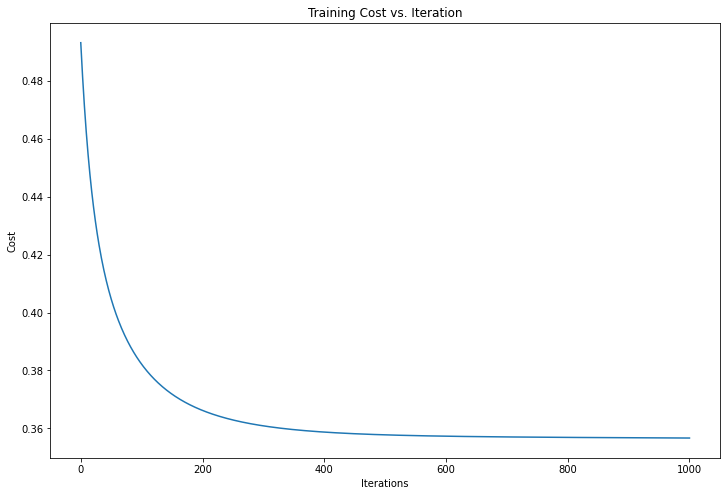

In [92]:
# Watch error decrease as weights keep being updated
fig, ax = plt.subplots(figsize=(12,8))
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
ax.plot(cost)
ax.set_title("Training Cost vs. Iteration")
plt.show()

In [93]:
# calculate R^2 to get an idea of the fit of this model to the data
# R^2 = 1 - ((sum of squares of (data value - predicted value))/(sum of squares of (data vlue - observed data)))
pred_value = np.ravel(X * W_final.T * datastddevs[len(datastddevs) - 1] + datameans[len(datameans) - 1])
numerator = np.sum((data.quality - pred_value) ** 2)
denominator = np.sum((data.quality - data.quality.mean()) ** 2)
r_squared = 1 - numerator / denominator
print(r_squared)

0.2774331641055876


In [94]:
# check error on testing data with final weights
mse_cost(X_test, y_test, W_final)

0.37922630809035096